In [1]:
import pandas as pd

# Bibliotecas para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns


Carregando dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Quais colunas estão presentes no dataset?

Para verificar a quantidade de colunas presente no dataset, basta verificar via **columns** da biblioteca do pandas, ela retorna em formato de lista todas as colunas do dataset

In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
print(f"O dataset possui {len(df.columns)} colunas")

O dataset possui 12 colunas


### Quantos filmes estão disponíveis na Netflix?

É possível observar que o dataset possui uma coluna **type** nela é explicitado o tipo do contéudo. 

Como é possível observar no código abaixo, possuimos os seguintes tipos : **Movie** e **TV Show**

Assim, temos que filtrar apenas as linhas que possuam **Movie** como type

In [6]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [8]:
df_movies = df[df['type'] == 'Movie']
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


Após a criação do dataset contendo apenas filmes, para garantir que não houvesse linhas com filmes repetidos, utilizei a função unique sobre a coluna de titúlos, garantindo que não haveria repetição e tivessemos o número exato de filmes

In [9]:
filmes_unicos = df_movies['title'].unique()

print(f"A netflix possui {len(filmes_unicos)} filmes disponíveis")

A netflix possui 6131 filmes disponíveis


### Quem são os 5 diretores com mais filmes e séries na plataforma?

In [46]:
df_directos_movie = df['director'].value_counts().head(5)

In [48]:
print("Os 5 diretores com mais obras são:")

for key, value in df_directos_movie.items():
    print(f"{key} - {value} obras")

Os 5 diretores com mais obras são:
Rajiv Chilaka - 19 obras
Raúl Campos, Jan Suter - 18 obras
Marcus Raboy - 16 obras
Suhas Kadav - 16 obras
Jay Karas - 14 obras


### Quais diretores também atuaram como atores em suas próprias produções?

Nessa questão voltamos a atuar no dataset como um todo, dado que não há exclusividade de filmes

Inicialmente, converti a coluna de cast para uma lista, afim de facilitar a verificação do diretor, uma vez que, antes ela era uma longa string contendo o nome dos atores

In [12]:
df['cast'] = df['cast'].apply(lambda x: x.split(", ") if pd.notnull(x) else [])

In [35]:
list_directors_actors = df[df.apply(lambda row: row['director'] in row['cast'], axis=1)]

In [36]:
list_directors_actors

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
107,s108,Movie,A Champion Heart,David de Vos,"[Mandy Grace, David de Vos, Donna Rusch, Devan...",United States,"September 4, 2021",2018,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...
139,s140,Movie,Do the Right Thing,Spike Lee,"[Danny Aiello, Ossie Davis, Ruby Dee, Richard ...",United States,"September 1, 2021",1989,R,120 min,"Classic Movies, Comedies, Dramas","On a sweltering day in Brooklyn, simmering rac..."
231,s232,Movie,The Water Man,David Oyelowo,"[David Oyelowo, Rosario Dawson, Lonnie Chavis,...",United States,"August 25, 2021",2021,PG,92 min,"Children & Family Movies, Dramas","Desperate to save his ailing mother, 11-year-o..."
350,s351,Movie,Space Cowboys,Clint Eastwood,"[Clint Eastwood, Tommy Lee Jones, Donald Suthe...",United States,"August 1, 2021",2000,PG-13,130 min,"Action & Adventure, Dramas, Sci-Fi & Fantasy",A retired engineer agrees to help NASA prevent...
351,s352,Movie,Team America: World Police,Trey Parker,"[Trey Parker, Matt Stone, Kristen Miller, Masa...","United States, Germany","August 1, 2021",2004,R,98 min,"Action & Adventure, Comedies, Cult Movies","In this musical satire, an all-marionette poli..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8682,s8683,Movie,Vizontele Tuuba,Yılmaz Erdoğan,"[Yılmaz Erdoğan, Tarık Akan, Altan Erkekli, Ce...",Turkey,"March 10, 2017",2004,NR,106 min,"Comedies, Dramas, International Movies","With civil war looming, a TV-obsessed Turkish ..."
8708,s8709,Movie,We're No Animals,Alejandro Agresti,"[John Cusack, Paul Hipp, Kevin Morris, Alejand...","United States, Argentina","August 15, 2017",2015,TV-MA,94 min,"Comedies, Dramas, Independent Movies","Unhappy with his commercial film work, a jaded..."
8719,s8720,Movie,What a Wonderful Family!,Huang Lei,"[Huang Lei, Sun Li, Lee Li-Chun, Zhang Weixin,...",China,"July 1, 2018",2017,TV-14,102 min,"Comedies, Dramas, International Movies","In a large family living under one roof, a sto..."
8751,s8752,Movie,Wish I Was Here,Zach Braff,"[Zach Braff, Kate Hudson, Donald Faison, Joey ...",United States,"August 16, 2018",2014,R,106 min,"Comedies, Dramas, Independent Movies","With his acting career moribund, Aidan Bloom s..."


In [37]:
directors_titles = list_directors_actors.groupby('director')['title'].apply(list)
directors_titles

director
Aamir Khan                                          [Taare Zameen Par]
Adrian Murray                                              [Withdrawn]
Alan Alda                                           [The Four Seasons]
Alan Rickman                                          [A Little Chaos]
Alejandro Agresti                                   [We're No Animals]
                                           ...                        
Youssef Chahine         [Alexandria: Again and Forever, Cairo Station]
Yvan Attal                                       [They Are Everywhere]
Yılmaz Erdoğan       [Ekşi Elmalar, Neseli Hayat, Organize Isler, M...
Zach Braff                                           [Wish I Was Here]
Zoe Lister-Jones                                            [Band Aid]
Name: title, Length: 222, dtype: object

In [38]:
directors_counts = directors_titles.apply(len)

top_directors = directors_counts.sort_values(ascending=False)

top_directors.head(5)


director
Yılmaz Erdoğan    6
Omoni Oboli       6
Clint Eastwood    4
Rano Karno        3
Louis C.K.        3
Name: title, dtype: int64

In [43]:
# Print a quantiadade de diretores que dirigiram suas obras, bem como seus nomes e obras trabalhadas
print(f"Temos um total de {len(top_directors)} diretores que também trabalham como atores\n")
for director in top_directors.index:
    print(f"{director} ({top_directors[director]} obras):")
    for title in directors_titles[director]:
        print(f" - {title}")

    print(" ")


Temos um total de 222 diretores que também trabalham como atores

Yılmaz Erdoğan (6 obras):
 - Ekşi Elmalar
 - Neseli Hayat
 - Organize Isler
 - Money Trap
 - The Butterfly's Dream
 - Vizontele Tuuba
 
Omoni Oboli (6 obras):
 - Love Is War
 - Moms at War
 - Being Mrs Elliot
 - The First Lady
 - Wives on Strike
 - Wives on Strike: The Revolution
 
Clint Eastwood (4 obras):
 - Space Cowboys
 - Million Dollar Baby
 - The Outlaw Josey Wales
 - Gran Torino
 
Rano Karno (3 obras):
 - Si Doel the Movie 2
 - Si Doel the Movie 3
 - Si Doel the Movie
 
Louis C.K. (3 obras):
 - Louis C.K. 2017
 - Louis C.K.: Hilarious
 - Louis C.K.: Live at the Comedy Store
 
Sermiyan Midyat (3 obras):
 - Bir Baba Hindu
 - Hükümet Kadin
 - Hükümet Kadin 2
 
Note Chern-Yim (3 obras):
 - Holy Man 2
 - Holy Man 3
 - The Holy Man
 
Sylvester Stallone (3 obras):
 - Rocky II
 - Rocky III
 - Rocky IV
 
Kunle Afolayan (3 obras):
 - Oct-01
 - The Bridge
 - The Figurine (Araromire)
 
George Clooney (2 obras):
 - The Midnig

### Explore o dataset e compartilhe um insight ou número que você considere interessante.

In [51]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,[],NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,[],NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


##### Análise Rating das obras

Há duas classificações sobre o rating, que são usados para classificar o conteúdo das obras. Eles são classificados da seguinte forma:

Classificações de Filmes (MPAA Ratings):

- G (General Audiences): Público geral. Conteúdo adequado para todas as idades.
- PG (Parental Guidance Suggested): Orientação dos pais sugerida. Alguns materiais podem não ser adequados para crianças pequenas.
- PG-13 (Parents Strongly Cautioned): Pais fortemente advertidos. Alguns conteúdos podem ser inadequados para menores de 13 anos.
- R (Restricted): Restrito. Menores de 17 anos requerem acompanhamento dos pais ou responsável adulto.
- NC-17 (No One 17 and Under Admitted): Proibido para menores de 18 anos. Ninguém com 17 anos ou menos é admitido.
- NR (Not Rated): Não classificado. O filme não foi submetido ao sistema de classificação.
- UR (Unrated): Sem classificação. Similar ao NR; o filme não possui classificação oficial.

Classificações de Programas de TV (TV Parental Guidelines):
- TV-Y: Adequado para todas as crianças. Conteúdo voltado para crianças de 2 a 6 anos.
- TV-Y7: Indicado para crianças de 7 anos ou mais. Pode conter temas ligeiramente mais complexos ou violência leve.
- TV-Y7-FV (Fantasy Violence): Indica que o programa contém violência fantasiosa mais intensa, adequada para crianças acima de 7 anos.
- TV-G: Público geral. Adequado para todas as idades; conteúdo considerado apropriado para o público em geral.
- TV-PG: Orientação dos pais sugerida. Pode conter materiais que os pais possam considerar inadequados para crianças pequenas.
- TV-14: Pais fortemente advertidos. Conteúdo pode ser inadequado para menores de 14 anos.
- TV-MA: Apenas para adultos. Inadequado para menores de 17 anos.

Assim, iremos quantificar os conteúdos que são para maiores de 17 anos dos que não são adequados para crianças e adolescentes. Iremos considerar as categorias R e NC-17 como adultas, uma vez que é necessário o acompanhamento de um adulto para que o adolescente assista

In [58]:
adults = ['TV-MA', 'R', 'NC-17']
childs = ['PG-13', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-G', 'G', 'TV-Y7-FV']

In [59]:
adults_count = df[df['rating'].isin(adults)].shape[0]
childs_count = df[df['rating'].isin(childs)].shape[0]

print(f"Quantidade de filmes para maiores de 17 (Com alguma restrição): {adults_count}")
print(f"Quantidade de filmes para crianças ou todos os públicos: {childs_count}")

Quantidade de filmes para maiores de 17 (Com alguma restrição): 4009
Quantidade de filmes para crianças ou todos os públicos: 4708


Criando um gráfico de pizza

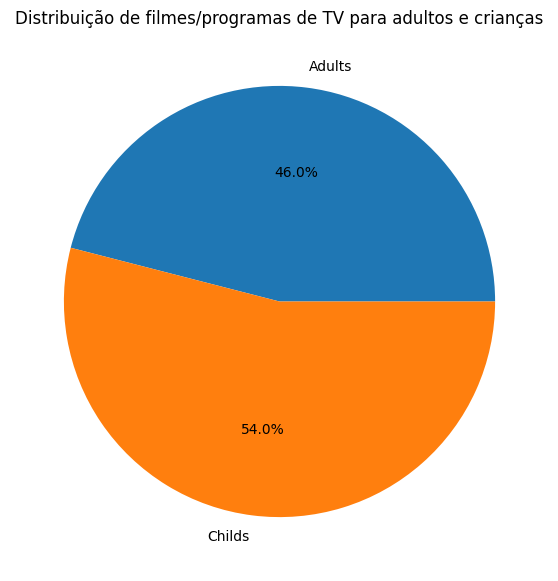

In [64]:
plt.figure(figsize=(7, 7))
plt.pie([adults_count, childs_count], labels=['Adults', 'Childs'], autopct='%1.1f%%')
plt.title('Distribuição de filmes/programas de TV para adultos e crianças')
plt.show()

##### Análise tipos de conteúdo

Nessa análise, quero ver quais os gêneros de obras mais comuns. Essa análise, pode ser interessante, uma vez que, pode trazer indicativos de gêneros mais populares, ajudando na escolha de novas obras para a plataforma

In [56]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,[],United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,[],NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,[],NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [ ]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(", ") if pd.notnull(x) else [])

In [70]:
all_categories = df['listed_in'].explode()

category_counts = all_categories.value_counts()

category_counts = category_counts[~category_counts.index.isin(['International Movies', 'International TV Shows', 'Movies', ''])]
category_counts

listed_in
Dramas                          2427
Comedies                        1674
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
Classic Movies                   116
LGBTQ Movies                

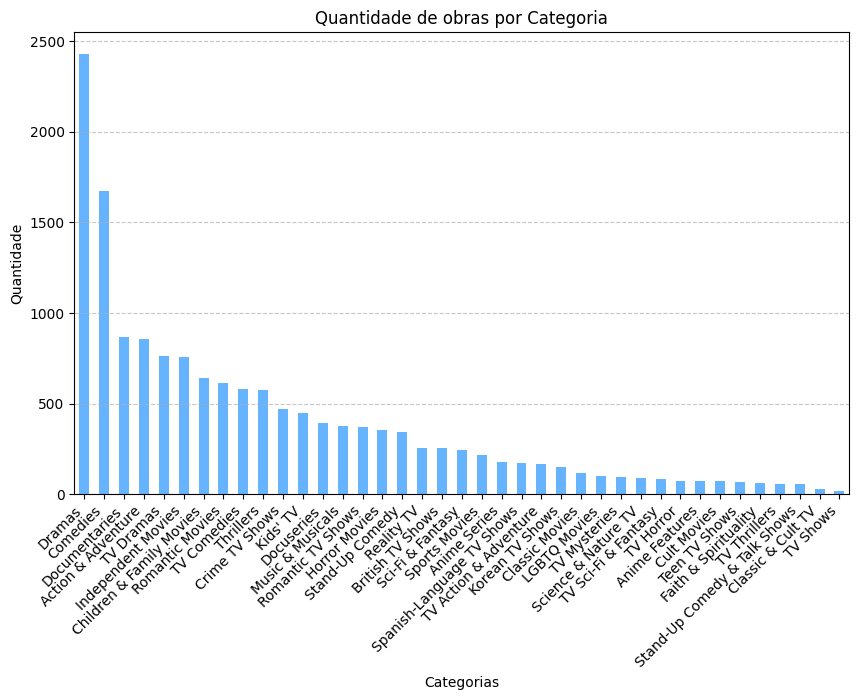

In [74]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='#66b3ff')
plt.title('Quantidade de obras por Categoria')
plt.xlabel('Categorias')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Crescimento dos filmes LGBTQ ao longo dos anos

In [75]:
lgbt_movies = df[df.apply(lambda row: 'LGBTQ Movies' in row['listed_in'], axis=1)]
movies_per_year = lgbt_movies['release_year'].value_counts().sort_index()

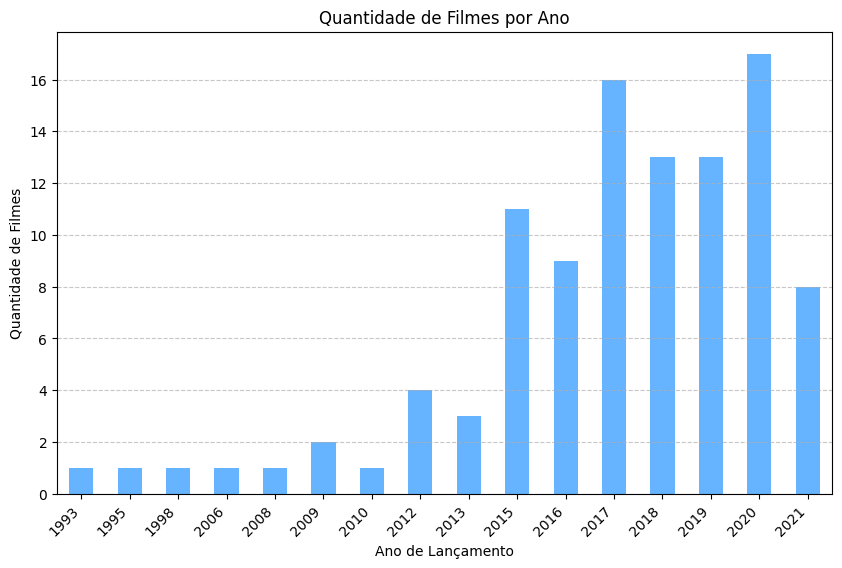

In [78]:
# Criar o gráfico de barras para a quantidade de filmes por ano
plt.figure(figsize=(10, 6))
ax = movies_per_year.plot(kind='bar', color='#66b3ff')
plt.title('Quantidade de Filmes por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Filmes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)